In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

/tmp/ipykernel_31864/2347367571.py:13: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


[ 1.21943972e-03 -3.27152088e+00  7.22119255e+03]
[8.11835572e-05 3.73236864e-01 4.28219497e+02]


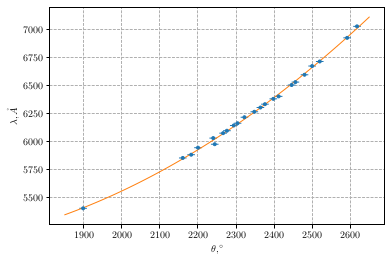

In [4]:
grad = pd.read_csv('spectrum.csv', names=['N', 'T', 'A'])
# plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(grad['T'], grad['A'], xerr=10, yerr=0, fmt='.', linewidth=1)
plt.grid(linestyle='--')
poly, cov = np.polyfit(grad['T'], grad['A'], 2, cov=True)
x = np.linspace(1850, 2650, num=100)
plt.plot(x, np.polyval(poly, x), linewidth=1)
plt.xlabel('$\\theta, ^\circ$')
plt.ylabel('$\lambda, \mathring{A}$')

plt.savefig('spectrum.pgf')

plt.show()
print(poly)
print(np.sqrt(np.diag(cov)))

0.2921420850348308 0.664659200096085 -2.275123079294928
0.38548573075814363 1.1307672720284427 -2.933357013772045
0.39064119650525747 1.4539004886717029 -3.721830932524638
0.3773459169338274 1.6418979863837726 -4.351174645601641
0.30796249350966654 1.5865605815338555 -5.151798075969454


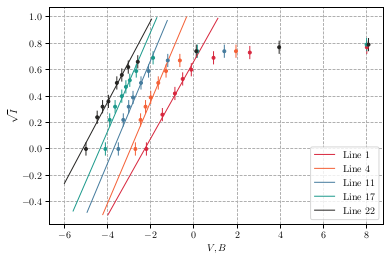

In [71]:
lines = []
line_names = []

for file, col in zip([1, 4, 11, 17, 22], ['#d7263d', '#f46036', '#457b9d', '#1b998b', '#252422']):
    volt = pd.read_csv(f'l{file}.csv', names=['V', 'I'])
    volt['sI'] = np.sqrt(volt['I']).round(2)
    plt.errorbar(volt['V'], volt['sI'], xerr=0.01, yerr=0.05, fmt=f'.', color=col, linewidth=1)
    line_approx_ix = volt['sI'] <= 0.65
    poly = np.polyfit(volt['V'][line_approx_ix], volt['sI'][line_approx_ix], 1)
    x = np.linspace(-6, 2, num=100)
    y = np.polyval(poly, x)
    x = x[np.logical_and(y >= -0.5, y <= 1)]
    y = y[np.logical_and(y >= -0.5, y <= 1)]
    plt.grid(linestyle='--')
    line, = plt.plot(x, y, col, linewidth=1)
    lines.append(line)
    
#     print(volt.to_latex(index=False))
    
    plt.xlabel('$V, B$')
    plt.ylabel('$\\sqrt I$')
    
    line_names.append(f'Line {file}')
    
    print(poly[0], poly[1], -poly[1]/poly[0])

plt.legend(lines, line_names, loc='lower right')
plt.savefig('lines.pgf')

[  5.24385968 -11.85631738]


/tmp/ipykernel_31864/1851901646.py:15: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


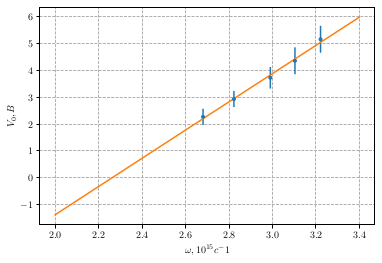

In [91]:
l = np.array([7032, 6678, 6304, 6074, 5852])
V = np.array([-2.27, -2.93, -3.72, -4.35, -5.15])
V = np.array(V)
w = 3/l*2*np.pi*1e3
plt.errorbar(w, -V, fmt='.', yerr=[0.3, 0.3, 0.4, 0.5, 0.5])
plt.grid(linestyle='--')
plt.xlabel('$\\omega, 10^{15}c^-1$')
plt.ylabel('$V_0, B$')
poly = np.polyfit(w, -V, 1)
print(poly)
x = np.linspace(2, 3.4, num=100)
y = np.polyval(poly, x)
plt.plot(x, y)
plt.savefig('hbar.pgf')
plt.show()